In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [44]:
data = pd.read_csv("heart_2020_cleaned.csv")

## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

*by Annika Le*

In [45]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [46]:
data.shape

(319795, 18)

In [47]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [48]:
#...Distribution of continuous variables...#


In [49]:
#...Distribution of categorical variables...#
len(pd.unique(data['Smoking']))

2

In [50]:
data.Smoking.value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

In [51]:
len(pd.unique(data['AlcoholDrinking']))

2

In [52]:
data.AlcoholDrinking.value_counts()

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

In [53]:
len(pd.unique(data['Stroke']))

2

In [54]:
data.Stroke.value_counts()

No     307726
Yes     12069
Name: Stroke, dtype: int64

In [55]:
len(pd.unique(data['DiffWalking']))

2

In [56]:
data.DiffWalking.value_counts()

No     275385
Yes     44410
Name: DiffWalking, dtype: int64

In [57]:
len(pd.unique(data['Sex']))

2

In [58]:
data.Sex.value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [59]:
len(pd.unique(data['AgeCategory']))

13

In [60]:
data.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [61]:
len(pd.unique(data['Race']))

6

In [62]:
data.Race.value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [63]:
len(pd.unique(data['Diabetic']))

4

In [64]:
data.Diabetic.value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [65]:
len(pd.unique(data['PhysicalActivity']))

2

In [66]:
data.PhysicalActivity.value_counts()

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64

In [67]:
len(pd.unique(data['GenHealth']))

5

In [68]:
data.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [69]:
len(pd.unique(data['Asthma']))

2

In [70]:
data.Asthma.value_counts()

No     276923
Yes     42872
Name: Asthma, dtype: int64

In [71]:
len(pd.unique(data['KidneyDisease']))

2

In [72]:
data.KidneyDisease.value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

In [73]:
len(pd.unique(data['SkinCancer']))

2

In [74]:
data.SkinCancer.value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

In [75]:
#...Association of the response with the predictors...#
# corrwith?

### Data cleaning
*by Candy Tantichirasakul and Annika Le*

From the data quality check we realized that:

1. Diabetes has four unique values, but the "Yes (during pregnancy)" values can be combined with the "Yes" values, and the "No, borderline diabetes" values can be combined with the "No" values.

2. All the categorical variables are given in qualitative form, but we need to convert them to quantitative form to create models. We changed all the "Yes" values to 1, and all the "No" values to 0. We also changed the "Female" values to 1 and the "Male" values to 0.

3. We also have categorical variables with more than two levels. It would not make sense to replace with numbers because that would create unreasonable constraints in our model and provide unrealistic results. As a result, we converted each level into a dummy variable.

The code below implements the above cleaning.

In [76]:
#...Code with comments...#

In [77]:
data.replace("Yes", 1, inplace = True)
data.replace("No", 0, inplace = True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [78]:
data['Diabetic'].unique()

array([1, 0, 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [79]:
data.replace("Yes (during pregnancy)", 1, inplace = True)
data.replace("No, borderline diabetes", 0, inplace = True)

In [80]:
data["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [81]:
data.replace("Female", 1, inplace = True)
data.replace("Male", 0, inplace = True)

In [82]:
# Make dummies for categorical variables
# Replace columns with special characters "-", "/" or " "

def makeDummies(data):
    data = pd.concat([data, pd.get_dummies(data['Race'])], axis=1)
    data = pd.concat([data, pd.get_dummies(data['AgeCategory'])], axis=1)
    data = pd.concat([data, pd.get_dummies(data['GenHealth'])], axis=1)
    #remove last category to avoid multicollinearity
    data = data.drop(columns=['Race', 'Other','AgeCategory','80 or older', 'GenHealth', "Excellent"])
    data.rename(columns={"18-24": "Age1", "25-29": "Age2", "30-34": "Age3","35-39": "Age4","40-44": "Age5","45-49": "Age6","50-54": "Age7","55-59": "Age8","60-64": "Age9","65-69": "Age10","70-74": "Age11","75-79": "Age12"}, inplace = True)
    data.rename(columns={"Very good": "Verygood", "American Indian/Alaskan Native": "AmericanIndianAlaskanNative"}, inplace = True)
    return data

In [83]:
data = makeDummies(data)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,Age7,Age8,Age9,Age10,Age11,Age12,Fair,Good,Poor,Verygood
0,0,16.60,1,0,0,3.0,30.0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


### Data preparation
*By Annika Le*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since our dataset was very unbalanced with approximately 91% of observations without heart disease and 9% of observations with heart disease, we used SMOTE to balance our dataset. We will use this to develop all of our models.

In [84]:
X = data[['BMI', 'Smoking', 'AlcoholDrinking','MentalHealth', "Stroke", "Sex",'PhysicalHealth', "DiffWalking", "Diabetic", "PhysicalActivity", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer", "Age1", "Age2", "Age3", "Age4", "Age5", "Age6", "Age7", "Age8", "Age9", "Age10", "Age11", "Age12", "White", "Black", "Asian", "AmericanIndianAlaskanNative", "Hispanic", "Poor", "Fair", "Good", "Verygood"]]
y = data.HeartDisease

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [86]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [87]:
train_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

In [88]:
train_smote[train_smote.HeartDisease == 1].count()[0]

204695

In [89]:
train_smote[train_smote.HeartDisease == 1].count()[1]

204695

## Exploratory data analysis


Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

Baseline Model

In [90]:
model = sm.logit(formula = 'HeartDisease~(Age1+Age2+Age3+Age4+Age5+Age6+Age7+Age8+Age9+Age10+Age11+Age12)+(Verygood+Fair+Good+Poor)+Asthma+Smoking+Diabetic+KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+(White+Black+Asian+AmericanIndianAlaskanNative+Hispanic)+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.353175
         Iterations 9


In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               409390
Model:                          Logit   Df Residuals:                   409354
Method:                           MLE   Df Model:                           35
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.4905
Time:                        23:48:50   Log-Likelihood:            -1.4459e+05
converged:                       True   LL-Null:                   -2.8377e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       4.5626      0.043    105.123      0.000       4.478       4.648
Age1                           -7.1262      0.093    -76.407      0.000      -7.309      -6.943
Age2                           -6.8080      0.088    -77.668      0.000      -6.980      -6.636
Age3                           -6.4686      0.070    -92.071      0.000      -6.606      -6.331
Age4                           -6.0390      0.056   -108.221      0.000      -6.148      -5.930
Age5                           -5.4319      0.042   -128.010      0.000      -5.515      -5.349
Age6                           -4.9088      0.034   -143.413      0.000      -4.976      -4.842
Age7                           -4.1399      0.025   -165.345      0.000      -4.189      -4.091
Age8                           -3.4751      0.020   -175.136      0.000      -3.514      -3.436
Age9                           -2.8900      0.017   -169.774      0.000      -2.923      -2.857
Age10                          -2.4087      0.016   -151.847      0.000      -2.440      -2.378
Age11                          -1.8997      0.015   -123.754      0.000      -1.930      -1.870
Age12                          -1.6150      0.017    -96.828      0.000      -1.648      -1.582
Verygood                       -0.8791      0.014    -64.115      0.000      -0.906      -0.852
Fair                           -0.0736      0.017     -4.245      0.000      -0.108      -0.040
Good                           -0.2952      0.013    -22.356      0.000      -0.321      -0.269
Poor                            0.2587      0.028      9.200      0.000       0.204       0.314
Asthma                         -0.3493      0.017    -20.890      0.000      -0.382      -0.317
Smoking                         0.0802      0.010      8.343      0.000       0.061       0.099
Diabetic                        0.0264      0.013      2.051      0.040       0.001       0.052
KidneyDisease                  -0.1929      0.024     -8.178      0.000      -0.239      -0.147
Stroke                          0.2416      0.023     10.683      0.000       0.197       0.286
Sex                            -1.4589      0.010   -142.904      0.000      -1.479      -1.439
AlcoholDrinking                -1.5426      0.033    -47.322      0.000      -1.606      -1.479
DiffWalking                    -0.3588      0.014    -25.122      0.000      -0.387      -0.331
BMI                             0.0369      0.001     43.582      0.000       0.035       0.039
SkinCancer                     -0.7063      0.015    -48.459      0.000      -0.735      -0.678
MentalHealth                    0.0105      0.001     15.279      0.000       0.009       0.012
White                          -1.5909      0.021    -76.651      0.000      -1.632      -1.550
Black                          -2.5804      0.031    -83.419      0.000      -2.641      -2.520
Asian                          -3.3798      0.067    -50.122      0.000  

In [92]:
from sklearn.metrics import roc_curve, auc
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))
    return pred_values

Classification accuracy = 83.6%
Precision = 24.2%
TPR or Recall = 43.3%
FNR = 56.7%
FPR = 12.7%
ROC-AUC = 77.8%


0         0.026237
1         0.664478
2         0.698770
3         0.343817
4         0.007722
            ...   
319790    0.323386
319791    0.008643
319792    0.011014
319793    0.002278
319794    0.748316
Length: 319795, dtype: float64

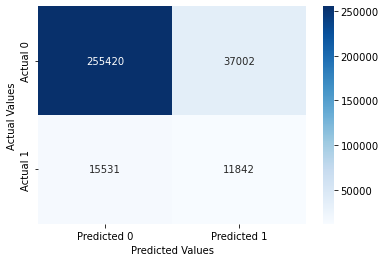

In [93]:
confusion_matrix_data(data,data.HeartDisease,model,0.6)

Forward Stepwise Selection 

*by Candy Tantichirasakul*

In [94]:
X = train_smote[['BMI', 'Smoking', 'AlcoholDrinking',"MentalHealth", "Stroke", "Sex",'PhysicalHealth', "DiffWalking", "Diabetic", "PhysicalActivity", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer", "Age1", "Age2", "Age3", "Age4", "Age5", "Age6", "Age7", "Age8", "Age9", "Age10", "Age11", "Age12", "White", "Black", "Asian", "AmericanIndianAlaskanNative", "Hispanic", "Poor", "Fair", "Good", "Verygood"]]


In [30]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('HeartDisease~' + '+'.join(predictor_subset),data = train_smote).fit()
    llr_pvalue = model.llr_pvalue
    return {"model":model, "llr_pvalue":llr_pvalue}
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [31]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [32]:
def forward_selection():
    models_best = pd.DataFrame(columns=["llr_pvalue", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [91]:
models_best = forward_selection()


Optimization terminated successfully.
         Current function value: 0.688846
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.689335
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678992
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.692087
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.689310
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.661930
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.662006
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.674587
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.684970
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.660807
  

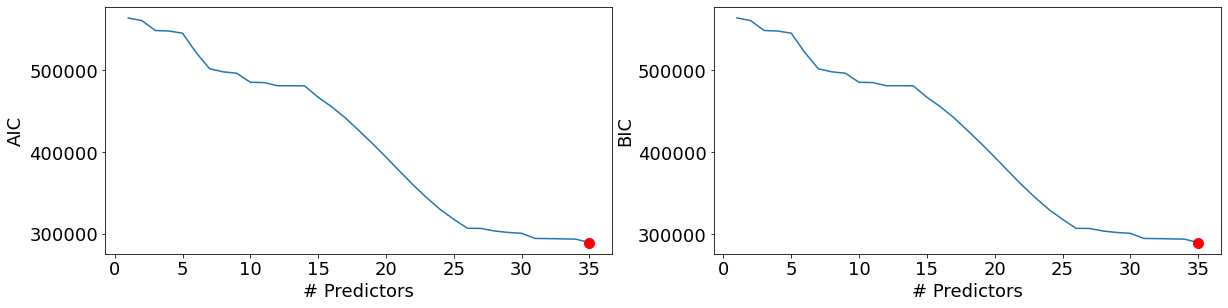

In [93]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    llr_pvalue = models_best.apply(lambda row: row[1].llr_pvalue, axis=1)

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [60]:
#Same as baseline model

Multicollinearity Analysis (VIF)

*by Candy Tantichirasakul*

In [20]:
X = train_smote[['BMI', 'Smoking', 'AlcoholDrinking','MentalHealth', "Stroke", "Sex",'PhysicalHealth', "DiffWalking", "Diabetic", "PhysicalActivity", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer", "Age1", "Age2", "Age3", "Age4", "Age5", "Age6", "Age7", "Age8", "Age9", "Age10", "Age11", "Age12", "White", "Black", "Asian", "AmericanIndianAlaskanNative", "Hispanic", "Poor", "Fair", "Good", "Verygood"]]


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                        feature        VIF
0                         const  66.723617
1                           BMI   1.153133
2                       Smoking   1.072095
3               AlcoholDrinking   1.036172
4                  MentalHealth   1.203340
5                        Stroke   1.039240
6                           Sex   1.065219
7                PhysicalHealth   1.881152
8                   DiffWalking   1.454292
9                      Diabetic   1.129705
10             PhysicalActivity   1.275750
11                    SleepTime   1.037361
12                       Asthma   1.047647
13                KidneyDisease   1.045073
14                   SkinCancer   1.059394
15                         Age1   1.187666
16                         Age2   1.140319
17                         Age3   1.146100
18                         Age4   1.154453
19                         Age5   1.151902
20                         Age6   1.147418
21                         Age7   1.161316
22         

Interactions

*by Candy Tantichirasakul*

In [36]:
#Interaction between Asthma and Smoking
model2 = sm.logit(formula = 'HeartDisease~(Age1+Age2+Age3+Age4+Age5+Age6+Age7+Age8+Age9+Age10+Age11+Age12)+(Verygood+Fair+Good+Poor)+Asthma*Smoking+Diabetic+KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+(White+Black+Asian+AmericanIndianAlaskanNative+Hispanic)+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()



Optimization terminated successfully.
         Current function value: 0.353174
         Iterations 9


Classification accuracy = 83.6%
Precision = 24.3%
TPR or Recall = 43.3%
FNR = 56.7%
FPR = 12.7%
ROC-AUC = 77.8%


0         0.025794
1         0.664184
2         0.695004
3         0.343466
4         0.007715
            ...   
319790    0.319479
319791    0.008490
319792    0.010996
319793    0.002273
319794    0.747911
Length: 319795, dtype: float64

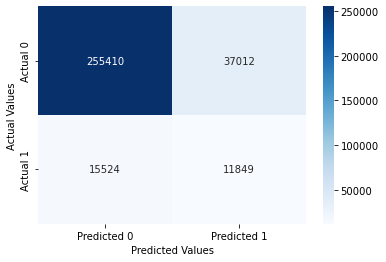

In [37]:
confusion_matrix_data(data,data.HeartDisease,model2,0.6)

In [38]:
#Interaction between Diabetic and Kidney
model3 = sm.logit(formula = 'HeartDisease~(Age1+Age2+Age3+Age4+Age5+Age6+Age7+Age8+Age9+Age10+Age11+Age12)+(Verygood+Fair+Good+Poor)+Asthma+Smoking+Diabetic*KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+(White+Black+Asian+AmericanIndianAlaskanNative+Hispanic)+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.353077
         Iterations 9


Classification accuracy = 83.6%
Precision = 24.2%
TPR or Recall = 43.3%
FNR = 56.7%
FPR = 12.7%
ROC-AUC = 77.9%


0         0.025571
1         0.665195
2         0.693589
3         0.345723
4         0.007737
            ...   
319790    0.318036
319791    0.008662
319792    0.011061
319793    0.002280
319794    0.749544
Length: 319795, dtype: float64

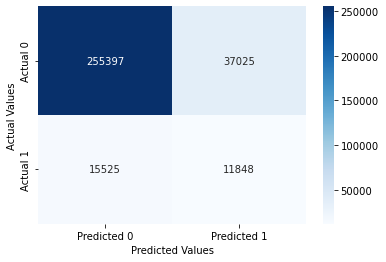

In [39]:
confusion_matrix_data(data,data.HeartDisease,model3,0.6)

In [40]:
#Interaction between both
model4 = sm.logit(formula = 'HeartDisease~(Age1+Age2+Age3+Age4+Age5+Age6+Age7+Age8+Age9+Age10+Age11+Age12)+(Verygood+Fair+Good+Poor)+Asthma*Smoking+Diabetic*KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+(White+Black+Asian+AmericanIndianAlaskanNative+Hispanic)+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.353075
         Iterations 9


Classification accuracy = 83.6%
Precision = 24.2%
TPR or Recall = 43.3%
FNR = 56.7%
FPR = 12.7%
ROC-AUC = 77.9%


0         0.025165
1         0.664917
2         0.690009
3         0.345388
4         0.007730
            ...   
319790    0.314388
319791    0.008517
319792    0.011044
319793    0.002276
319794    0.749161
Length: 319795, dtype: float64

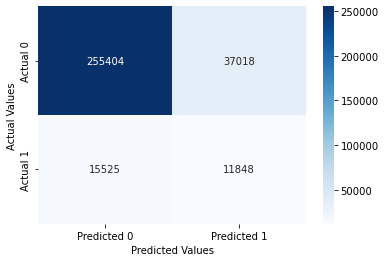

In [41]:
confusion_matrix_data(data,data.HeartDisease,model4,0.6)

In [42]:
#AgeCategory * GenHealth
model5 = sm.logit(formula = 'HeartDisease~(Age1+Age2+Age3+Age4+Age5+Age6+Age7+Age8+Age9+Age10+Age11+Age12)*(Verygood+Fair+Good+Poor)+Asthma+Smoking+Diabetic+KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+(White+Black+Asian+AmericanIndianAlaskanNative+Hispanic)+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.351447
         Iterations 9


Classification accuracy = 83.7%
Precision = 24.4%
TPR or Recall = 43.1%
FNR = 56.9%
FPR = 12.5%
ROC-AUC = 78.1%


0         0.023748
1         0.621006
2         0.665515
3         0.352514
4         0.005789
            ...   
319790    0.313019
319791    0.010676
319792    0.011606
319793    0.002057
319794    0.726488
Length: 319795, dtype: float64

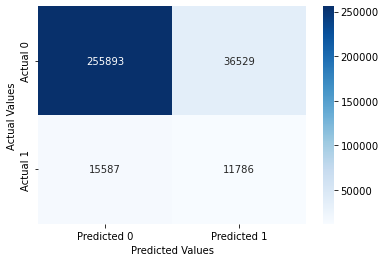

In [43]:
confusion_matrix_data(data,data.HeartDisease,model5,0.6)

In [44]:
#Stroke * Difficulty Walking
model6 = sm.logit(formula = 'HeartDisease~(Age1+Age2+Age3+Age4+Age5+Age6+Age7+Age8+Age9+Age10+Age11+Age12)+(Verygood+Fair+Good+Poor)+Asthma+Smoking+Diabetic+KidneyDisease+Sex+AlcoholDrinking+Stroke*DiffWalking+BMI+SkinCancer+MentalHealth+(White+Black+Asian+AmericanIndianAlaskanNative+Hispanic)+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.353114
         Iterations 9


Classification accuracy = 83.6%
Precision = 24.3%
TPR or Recall = 43.3%
FNR = 56.7%
FPR = 12.7%
ROC-AUC = 77.9%


0         0.026171
1         0.636488
2         0.699539
3         0.345168
4         0.007537
            ...   
319790    0.319094
319791    0.008650
319792    0.011036
319793    0.002284
319794    0.750241
Length: 319795, dtype: float64

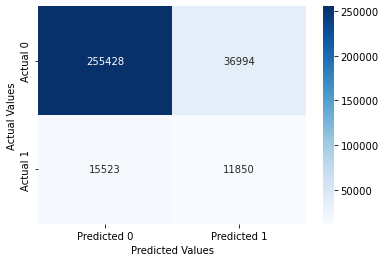

In [45]:
confusion_matrix_data(data,data.HeartDisease,model6,0.6)

Subset based on alcohol insight

*by Annika Le*

In [95]:
alcohol_yes = train_smote[train_smote.AlcoholDrinking == 1]
data_alc_yes = data[data.AlcoholDrinking == 1]
alcohol_no = train_smote[train_smote.AlcoholDrinking == 0]
data_alc_no = data[data.AlcoholDrinking == 0]

Optimization terminated successfully.
         Current function value: 0.347617
         Iterations 6
Classification accuracy = 88.9%
Precision = nan%
TPR or Recall = 0.0%
FNR = 100.0%
FPR = 0.0%
ROC-AUC = 50.0%


C:\Users\annik\AppData\Local\Temp\ipykernel_21972\1691262903.py:16: RuntimeWarning: invalid value encountered in double_scalars
  precision = (cm[1,1])/(cm[0,1]+cm[1,1])


8         0.110528
12        0.110528
37        0.110528
41        0.110528
76        0.110528
            ...   
408888    0.110528
408957    0.110528
409144    0.110528
409277    0.110528
409324    0.110528
Length: 16186, dtype: float64

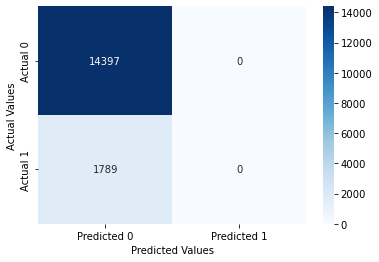

In [96]:
model_alc_yes = sm.logit(formula = 'HeartDisease~1', data = alcohol_yes).fit()
confusion_matrix_data(alcohol_yes,alcohol_yes.HeartDisease,model_alc_yes,0.6)

Optimization terminated successfully.
         Current function value: 0.358127
         Iterations 9
Classification accuracy = 82.8%
Precision = 24.1%
TPR or Recall = 44.7%
FNR = 55.3%
FPR = 13.6%
ROC-AUC = 77.7%


0         0.025263
1         0.657866
2         0.693264
3         0.344952
4         0.007575
            ...   
319790    0.319683
319791    0.007895
319792    0.010754
319793    0.002052
319794    0.746262
Length: 298018, dtype: float64

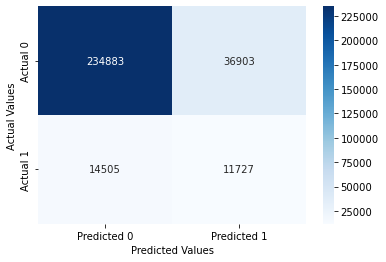

In [99]:
model_alc_no = sm.logit(formula = 'HeartDisease~(Age1+Age2+Age3+Age4+Age5+Age6+Age7+Age8+Age9+Age10+Age11+Age12)+(Verygood+Fair+Good+Poor)+Asthma+Smoking+Diabetic+KidneyDisease+Stroke+Sex+DiffWalking+BMI+SkinCancer+MentalHealth+(White+Black+Asian+AmericanIndianAlaskanNative+Hispanic)+SleepTime+PhysicalActivity+PhysicalHealth', data = alcohol_no).fit()
confusion_matrix_data(data_alc_no,data_alc_no.HeartDisease,model_alc_no,0.6)

Combine metrics from two subsets to calculate metrics for final model:

In [101]:
tn = 14397 + 234883
fn = 1789 + 14505
fp = 36903
tp = 11727

In [102]:
# accuracy = TN+TP/(TN+FN+FP+TP)
accuracy = (tn+tp)/(tn+fn+fp+tp)
accuracy

0.8306927983093786

In [103]:
# FNR = FN/(FN+TP)
FNR = fn/(fn+tp)
FNR

0.5814924520895043

In [104]:
# precision = TP/(FP+TP)
precision = tp/(fp+tp)
precision

0.24114743985194326

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

Subsetting stroke & difficulty walking

by Anna Xiao

In [49]:
subset_smote1 = train_smote.loc[((train_smote['Stroke'] == 1) & (train_smote['DiffWalking'] == 1))]
subset1 = data.loc[((data['Stroke'] == 1) & (data['DiffWalking'] == 1))]
model_subset1 = sm.logit(formula = 'HeartDisease~1', data = subset_smote1).fit() 

Optimization terminated successfully.
         Current function value: 0.577320
         Iterations 5


Classification accuracy = 44.4%
Precision = 44.4%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 100.0%
ROC-AUC = 50.0%


35        0.735883
135       0.735883
142       0.735883
270       0.735883
279       0.735883
            ...   
319565    0.735883
319588    0.735883
319619    0.735883
319620    0.735883
319765    0.735883
Length: 5346, dtype: float64

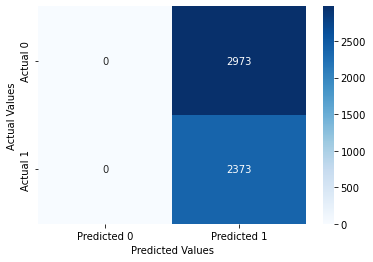

In [50]:
confusion_matrix_data(subset1, subset1.HeartDisease, model_subset1, 0.6)

In [56]:
subset_smote2 = train_smote.loc[((train_smote['Stroke'] == 0) | (train_smote['DiffWalking'] == 0))]
subset2 = data.loc[((data['Stroke'] == 0) | (data['DiffWalking'] == 0))]
model_subset2 = sm.logit(formula = 'HeartDisease~BMI+Smoking+AlcoholDrinking+MentalHealth+Stroke+Sex+PhysicalHealth+DiffWalking+Diabetic+PhysicalActivity+SleepTime+Asthma+KidneyDisease+SkinCancer+Age1+Age2+Age3+Age4+Age5+Age6+Age7+Age8+Age9+Age10+Age11+Age12+White+Black+Asian+AmericanIndianAlaskanNative+Hispanic+Poor+Fair+Good+Verygood', data = subset_smote2).fit()

Optimization terminated successfully.
         Current function value: 0.350502
         Iterations 9


Classification accuracy = 81.7%
Precision = 19.2%
TPR or Recall = 40.6%
FNR = 59.4%
FPR = 14.8%
ROC-AUC = 69.9%


0         0.198849
1         0.379411
2         0.592706
3         0.427956
4         0.580264
            ...   
319790    0.763587
319791    0.317100
319792    0.216450
319793    0.453194
319794    0.245228
Length: 314449, dtype: float64

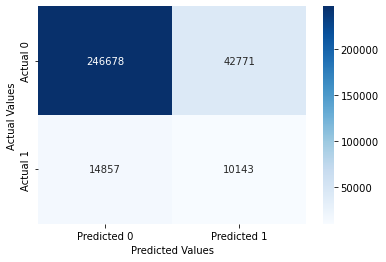

In [64]:
confusion_matrix_data(subset2, subset2.HeartDisease, model_subset2, 0.6)

Combine and calculate metrics for final model:

TN:246678, FN:14857, FP:45744, TP:12516

In [68]:
# calculated accuracy = TP+TN/(TP+TN+FP+FN)
(12516+246678)/(12516+246678+45744+14857)

0.8105004768679935

In [66]:
# calculated precision = TP/(TP+FP)
12516/(12516+45744)

0.2148300720906282

In [67]:
# calculated FNR = FN/(TP+FN)
14857/(12516+14857)

0.5427611149673035

Accuracy ~ 81.1%

Precision ~ 21.5%

FNR ~ 54.3 %

## Conclusions and Recommendations to stakeholder(s)

Odds Analysis

*by Candy Tantichirasakul*

In [98]:
# Odds with unit increase in SleepTime
np.exp(model.params.SleepTime) - 1

-0.07006289186190962

In [100]:
# Odds with PhysicalActivity
np.exp(model.params.PhysicalActivity) - 1

-0.3521210784057902